# Applying benford law to the covid 19 dataset at the John Hopkins hospital

In [6]:
# Installing the dependencies

#pip install -r ./requirements.txt

import sys
!{sys.executable} -m pip install benfordslaw

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=f0e016ffb599d1cb7c6a0073e57203c4ec50caace964ce1c770034d5cdd89e61
  Stored in directory: /Users/felipebruckmann/Library/Caches/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


In [7]:
import pandas as pd
import numpy as np
from benfordslaw import benfordslaw
import glob as gb

In [10]:
path = "./data/"

csv_files = gb.glob(path + "/*.csv")

df_list = (pd.read_csv(file) for file in csv_files)

daily_reports = pd.concat(df_list, ignore_index=True)

brazil_reports = daily_reports[daily_reports.Country_Region == "Brazil"]

print(brazil_reports.head())

    FIPS Admin2 Province_State Country_Region          Last_Update      Lat  \
41   NaN    NaN           Acre         Brazil  2022-01-22 04:21:13  -9.0238   
42   NaN    NaN        Alagoas         Brazil  2022-01-22 04:21:13  -9.5713   
43   NaN    NaN          Amapa         Brazil  2022-01-22 04:21:13   0.9020   
44   NaN    NaN       Amazonas         Brazil  2022-01-22 04:21:13  -3.4168   
45   NaN    NaN          Bahia         Brazil  2022-01-22 04:21:13 -12.5797   

      Long_  Confirmed   Deaths  Recovered  ...      Combined_Key  \
41 -70.8120    92004.0   1854.0        NaN  ...      Acre, Brazil   
42 -36.7820   248397.0   6403.0        NaN  ...   Alagoas, Brazil   
43 -52.0030   134108.0   2035.0        NaN  ...     Amapa, Brazil   
44 -65.8561   481295.0  13881.0        NaN  ...  Amazonas, Brazil   
45 -41.7007  1308146.0  27752.0        NaN  ...     Bahia, Brazil   

   Incident_Rate  Case_Fatality_Ratio  Province/State Country/Region  \
41  10432.061320             2.015130 

In [11]:
confirmed_reports = brazil_reports['Confirmed'].values
print(confirmed_reports)

[  92004.  248397.  134108. ... 3464158.  252753.  189136.]


[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=1.23036e-39, Tstat=203.395


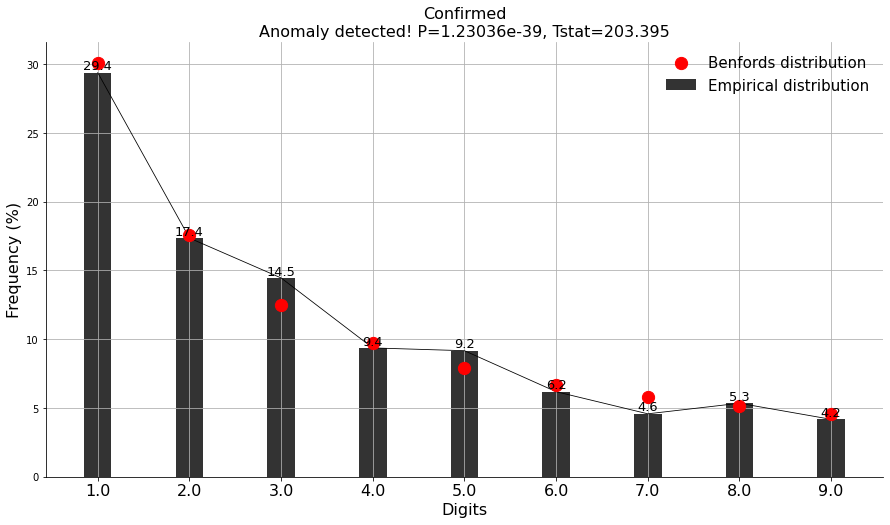

(<Figure size 1080x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Confirmed\nAnomaly detected! P=1.23036e-39, Tstat=203.395'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [12]:
bl = benfordslaw(alpha=0.05)

results = bl.fit(confirmed_reports)

# Plot
bl.plot(title='Confirmed')